In [55]:

import numpy as np
import time
import matplotlib.pyplot
%matplotlib inline

In [56]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

In [57]:
#Convert ubyte files into csv files for train and test images

convert(r'C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\train-images-idx3-ubyte\train-images-idx3-ubyte', r'C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\train-labels-idx1-ubyte\train-labels-idx1-ubyte',r'C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\mnist_train.csv', 60000)


In [58]:

convert(r'C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\t10k-images-idx3-ubyte\t10k-images-idx3-ubyte', r'C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\t10k-labels-idx1-ubyte\t10k-labels-idx1-ubyte',r'C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\mnist_test.csv', 10000)

In [59]:
train_file = open(r"C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\mnist_train.csv", 'r')
train_list = train_file.readlines()
train_file.close()
test_file = open(r"C:\Users\~ideapadGAMING~\Documents\MyPrograms\HomeProject\data\mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()

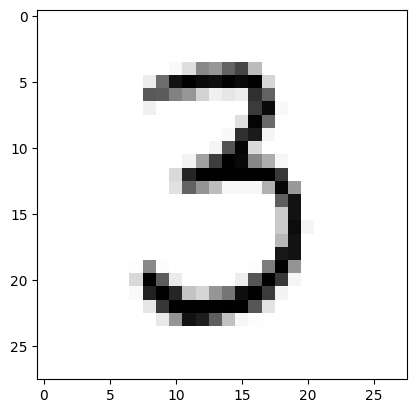

In [60]:
all_values = train_list[50].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [61]:

class NN:
  def __init__(self, sizes, epochs, lr):
    self.sizes = sizes
    self.epochs = epochs
    self.lr = lr

    input_layer=self.sizes[0]
    hidden_1=self.sizes[1]
    hidden_2=self.sizes[2]
    output_layer=self.sizes[3]

    self.params = {
        'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
        'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
        'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
    }
  def sigmoid(self, x, derivative=False):
      if derivative:
          return (np.exp(-x))/((np.exp(-x)+1)**2)
      return 1/(1 + np.exp(-x))

  def softmax(self, x, derivative=False):
      exps = np.exp(x - x.max())
      if derivative:
          return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
      return exps / np.sum(exps, axis=0)
  def forward_pass(self, x_train):
      params = self.params

      params['A0'] = x_train

      params['Z1'] = np.dot(params["W1"], params['A0'])
      params['A1'] = self.sigmoid(params['Z1'])

      params['Z2'] = np.dot(params["W2"], params['A1'])
      params['A2'] = self.sigmoid(params['Z2'])

      params['Z3'] = np.dot(params["W3"], params['A2'])
      params['A3'] = self.softmax(params['Z3'])

      return params['A3']

  def backward_pass(self, y_train, output):

      params = self.params
      change_w = {}

      error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
      change_w['W3'] = np.outer(error, params['A2'])

      error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
      change_w['W2'] = np.outer(error, params['A1'])

      error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
      change_w['W1'] = np.outer(error, params['A0'])

      return change_w

  def update_network_parameters(self, changes_to_w):

      
      for key, value in changes_to_w.items():
          self.params[key] -= self.lr * value

  def compute_accuracy(self, test_data, output_nodes):
    
      predictions = []

      for x in train_list:
          all_values = x.split(',')
          inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
          targets = np.zeros(output_nodes) + 0.01
          targets[int(all_values[0])] = 0.99
          output = self.forward_pass(inputs)
          pred = np.argmax(output)
          predictions.append(pred == np.argmax(targets))
      
      return np.mean(predictions)

  def train(self, train_list, test_list, output_nodes):
      start_time = time.time()
      for iteration in range(self.epochs):
          for x in train_list:
              all_values = x.split(',')
              inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
              targets = np.zeros(output_nodes) + 0.01
              targets[int(all_values[0])] = 0.99
              output = self.forward_pass(inputs)
              changes_to_w = self.backward_pass(targets, output)
              self.update_network_parameters(changes_to_w)
          
          accuracy = self.compute_accuracy(test_list, output_nodes)
          print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
              iteration+1, time.time() - start_time, accuracy * 100
          ))

In [71]:
nn = NN(sizes=[784, 128, 64, 10], epochs=20, lr=0.001)

In [72]:
nn.train(train_list, test_list, 10)

Epoch: 1, Time Spent: 43.93s, Accuracy: 19.76%
Epoch: 2, Time Spent: 87.28s, Accuracy: 25.73%
Epoch: 3, Time Spent: 129.66s, Accuracy: 29.43%
Epoch: 4, Time Spent: 172.68s, Accuracy: 36.29%
Epoch: 5, Time Spent: 212.83s, Accuracy: 41.77%
Epoch: 6, Time Spent: 491.37s, Accuracy: 45.52%
Epoch: 7, Time Spent: 536.39s, Accuracy: 48.66%
Epoch: 8, Time Spent: 579.63s, Accuracy: 51.30%
Epoch: 9, Time Spent: 620.63s, Accuracy: 53.34%
Epoch: 10, Time Spent: 661.34s, Accuracy: 54.74%
Epoch: 11, Time Spent: 703.07s, Accuracy: 55.85%
Epoch: 12, Time Spent: 744.66s, Accuracy: 57.14%
Epoch: 13, Time Spent: 819.79s, Accuracy: 58.67%
Epoch: 14, Time Spent: 860.51s, Accuracy: 60.30%
Epoch: 15, Time Spent: 906.26s, Accuracy: 61.84%
Epoch: 16, Time Spent: 952.42s, Accuracy: 63.20%
Epoch: 17, Time Spent: 1000.89s, Accuracy: 64.37%
Epoch: 18, Time Spent: 1049.65s, Accuracy: 65.45%
Epoch: 19, Time Spent: 1095.95s, Accuracy: 66.34%
Epoch: 20, Time Spent: 1144.44s, Accuracy: 67.08%


In [28]:
import pickle

# Save the model parameters to a file
def save_model(dnn, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(dnn.params, f)
    print(f"Model saved to {file_path}")
    
def load_model(dnn, file_path):
    with open(file_path, 'rb') as f:
        dnn.params = pickle.load(f)
    print(f"Model loaded from {file_path}")



In [82]:
# Example usage
save_model(nn, 'MnistnnV2.pkl')


Model saved to MnistnnV2.pkl


In [83]:
# Example usage
loaded_dnn = NN(sizes=[784, 128, 64, 10], epochs=10, lr=0.01)  
load_model(loaded_dnn, 'Mnistnn.pkl')


Model loaded from Mnistnn.pkl


In [97]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = "inputimage.png"  
img = Image.open(image_path).convert("L")
img_array = np.array(img) / 255.0
img_array = 1 - img_array  # Invert colors
img_flatten = img_array.flatten().reshape(1, -1)  # Shape: (1, 784)

nn = NN(sizes=[784, 128, 64, 10], epochs=15, lr=0.001)

# Perform forward pass
prediction = nn.forward_pass(img_flatten.T)

# Get the predicted label
predicted_label = np.argmax(prediction)

# Get the probabilities for all digits
probabilities = prediction.flatten()  # Flatten to a 1D array for easier viewing

# Print the predicted label and probabilities
print(f"Predicted Label: {predicted_label}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities):
    print(f"Digit {i}: {prob*100:.2f}%")

# Save the probabilities as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(10), probabilities, color='skyblue')
plt.xticks(range(10))  # Set x-ticks to represent the digits (0-9)
plt.title(f"Class Probabilities (Predicted Label: {predicted_label})")
plt.xlabel('Digits')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.savefig('probabilities_bar_chart.png')  # Save the bar chart
plt.close()  # Close the plot to free up memory

# Save the image with the predicted label
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')  # Turn off axis to better display the image
plt.savefig('input_image_with_prediction.png')  # Save the image
plt.close()  # Close the plot to free up memory

# Optional: You can print out where the images are saved
print("Plots saved as 'probabilities_bar_chart.png' and 'input_image_with_prediction.png'.")


Predicted Label: 8
Class Probabilities:
Digit 0: 8.19%
Digit 1: 10.28%
Digit 2: 8.88%
Digit 3: 8.27%
Digit 4: 12.85%
Digit 5: 2.49%
Digit 6: 3.35%
Digit 7: 3.66%
Digit 8: 37.63%
Digit 9: 4.41%
Plots saved as 'probabilities_bar_chart.png' and 'input_image_with_prediction.png'.
